In [3]:
from globalfunc import *

#### Spectra

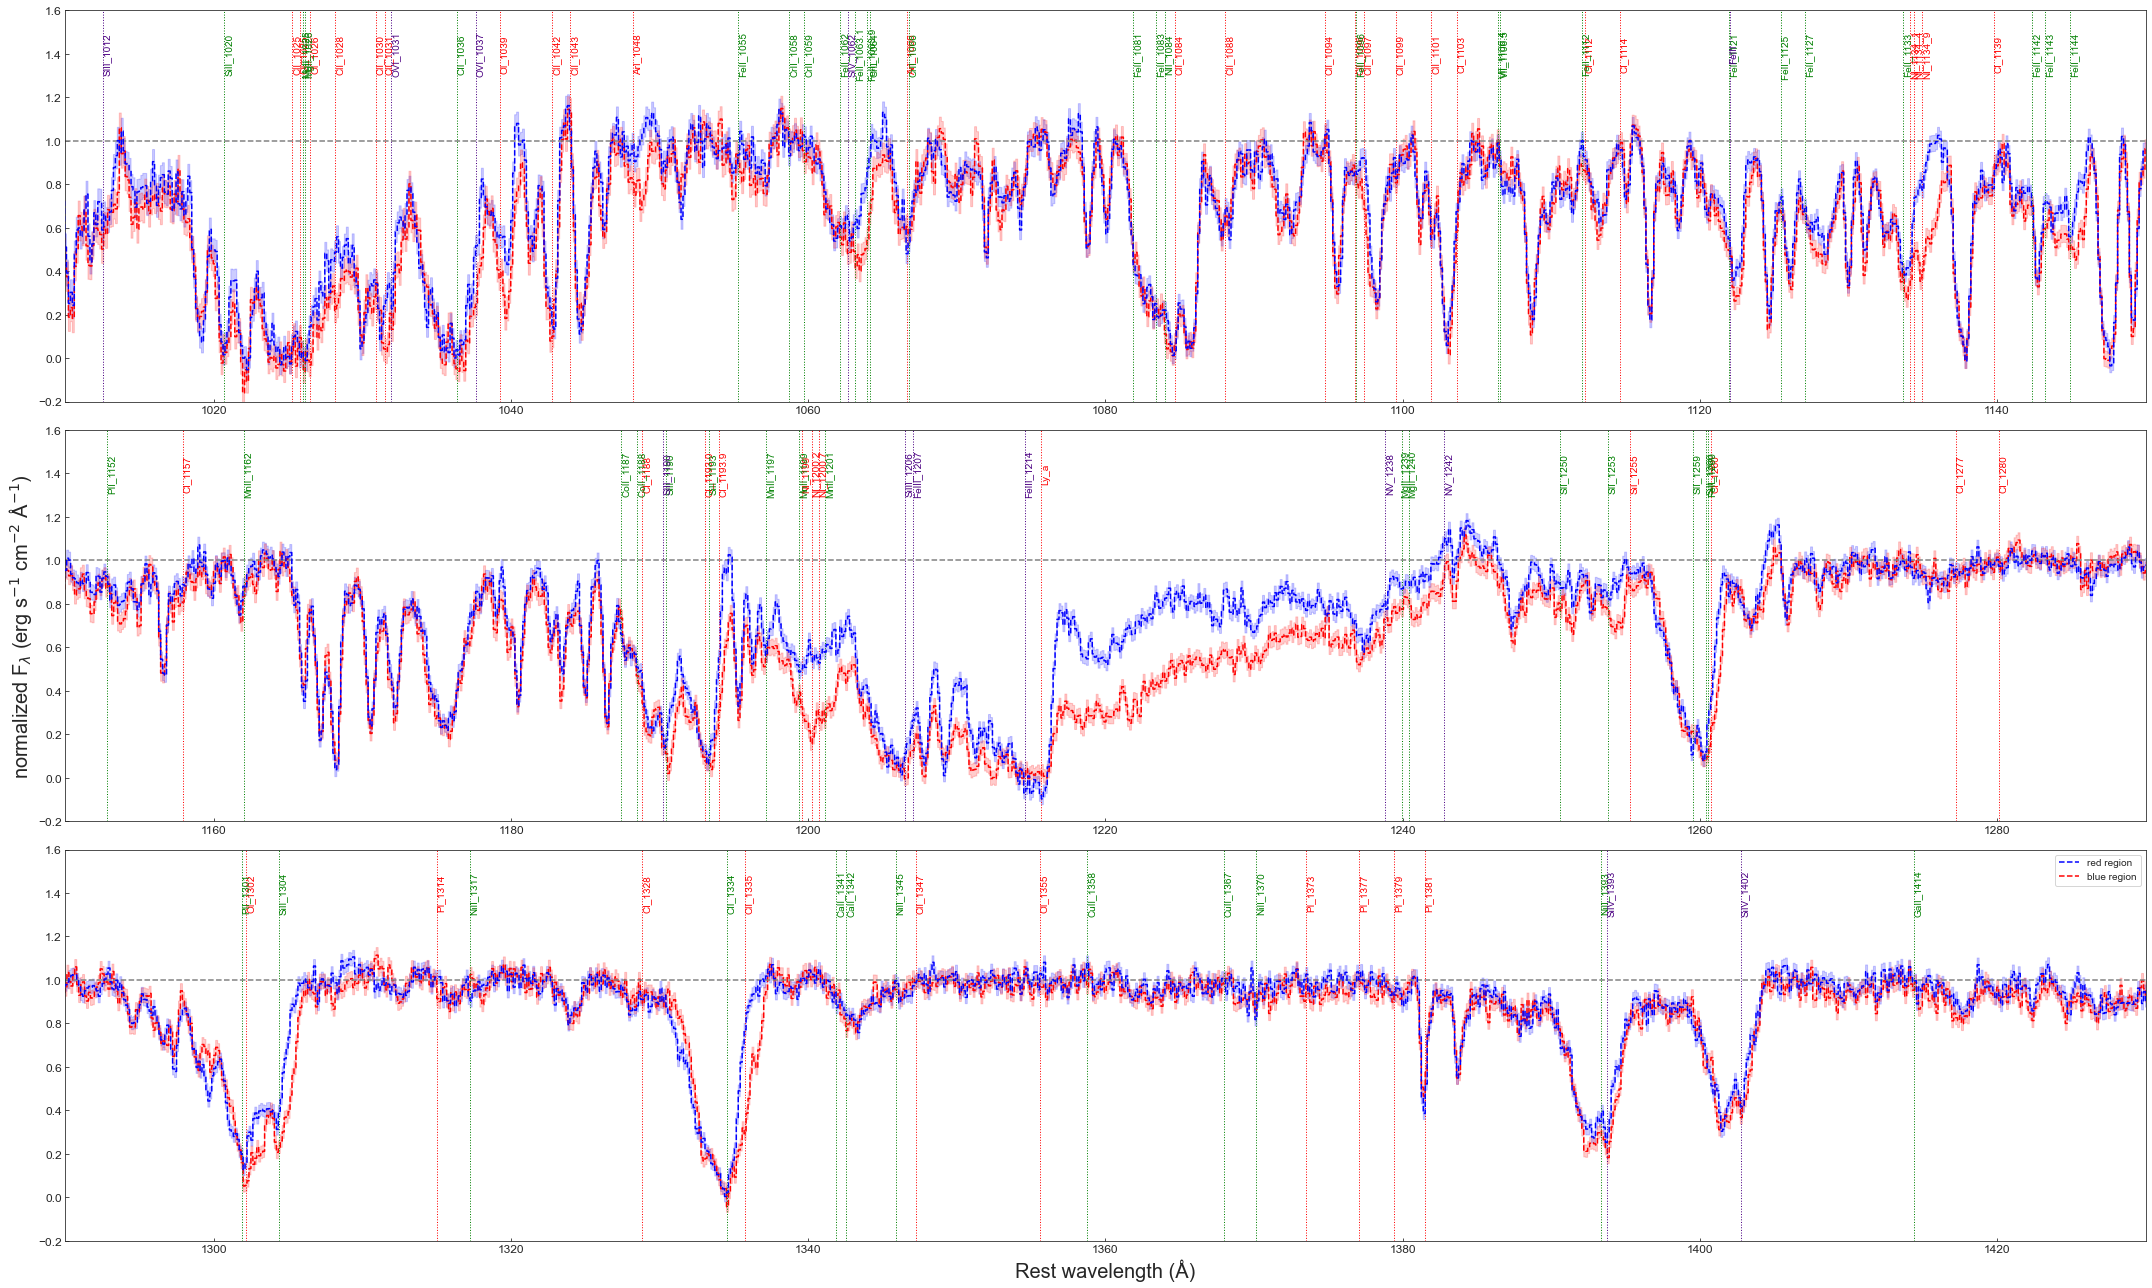

In [4]:
# plotting the spectra

fig, ax = plt.subplots(3,1,figsize=(30, 18),
#                       dpi=900 
                        )

for i in range(3):
    ax[i].plot(nwavelength, rnorm, drawstyle="steps-mid", color=ap1color,ls = '--', zorder=3, label = 'red region')
    ax[i].fill_between(nwavelength, rnorm-rnorm_err, rnorm+rnorm_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].plot(nwavelength, bnorm, drawstyle="steps-mid", color=ap0color,ls = '--', zorder=2, label = 'blue region')
    ax[i].fill_between(nwavelength, bnorm-bnorm_err, bnorm+bnorm_err, step='mid', color=ap0color, alpha =0.2)
    ax[i].axhline(y=1, color='gray',ls = '--')

    for line in rlines.items():
        ax[i].axvline(line[1], linestyle=":", color="red", lw=1)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in glines.items():
        ax[i].axvline(line[1], linestyle=":", color="green", lw=1)
        ax[i].text(line[1],1.4, line[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
    for line in tlines.items():
        ax[i].axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax[i].text(line[1],1.4, line[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)


# define the wavelength limits for each subplot
ax[0].axis([1010,1150,-0.2,1.6])
ax[1].axis([1150,1290,-0.2,1.6])
ax[2].axis([1290,1430,-0.2,1.6])

plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("normalized F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)", fontsize=20)
plt.tight_layout()
plt.legend()
# plt.savefig('improved.png')
plt.show()

#### Velocity profiles

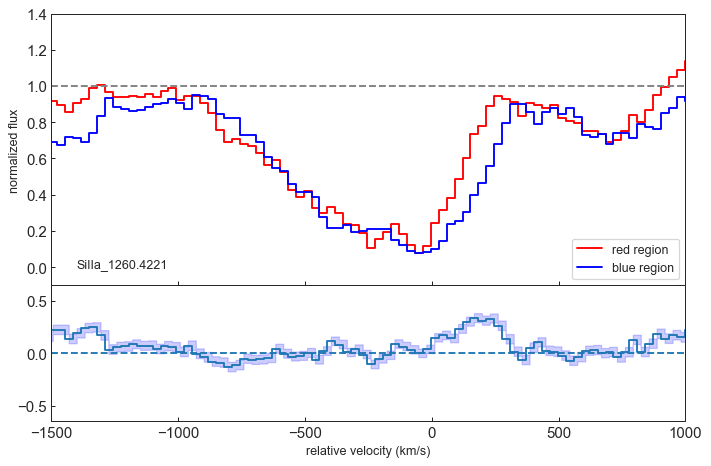

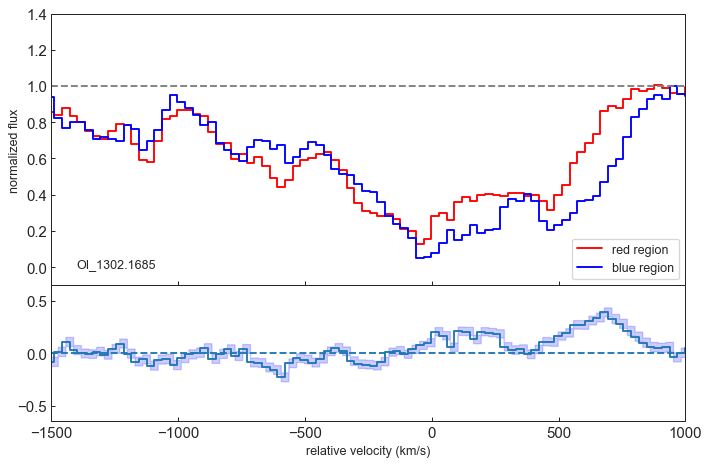

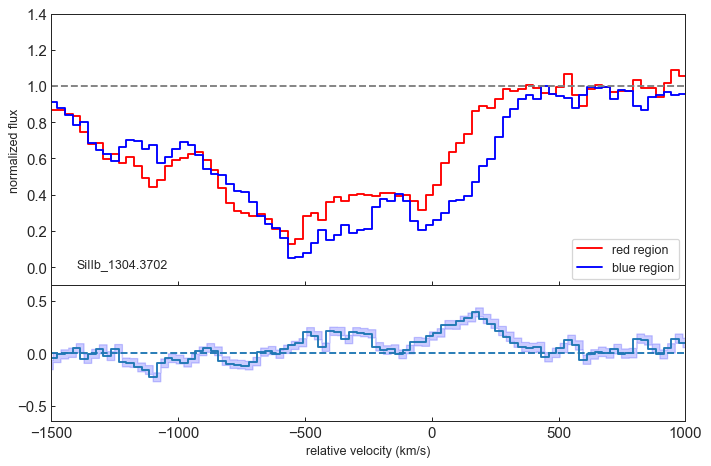

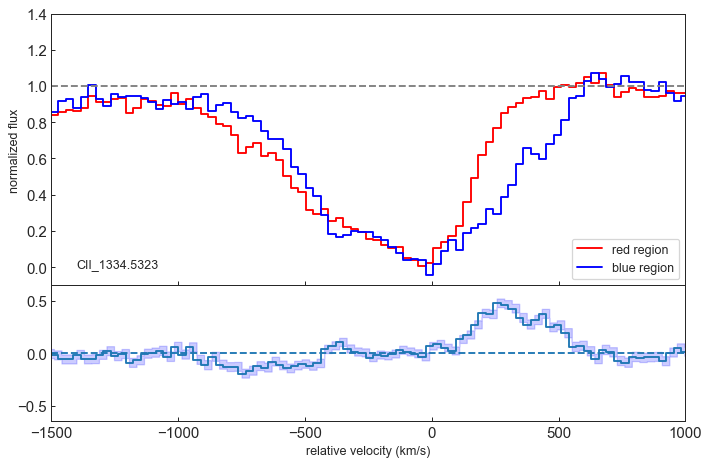

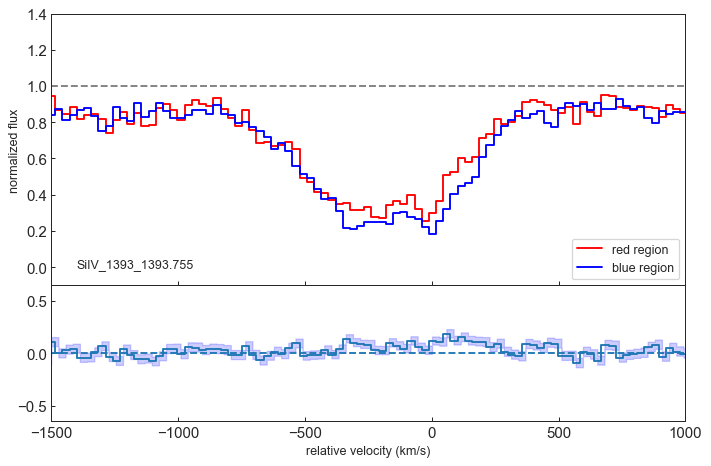

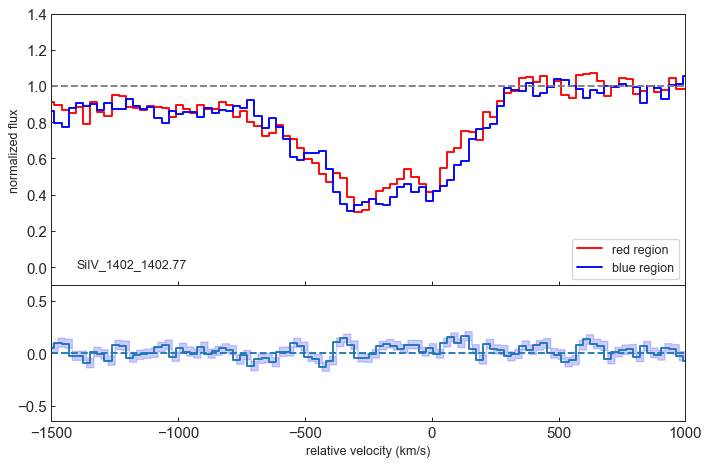

In [5]:

for j in abslines.items(): # for the absorption lines lambda > Lya
    vel_prof(rnorm,bnorm,j)

# use bluelines1.items() or bluelines.items() for lambda < Lya

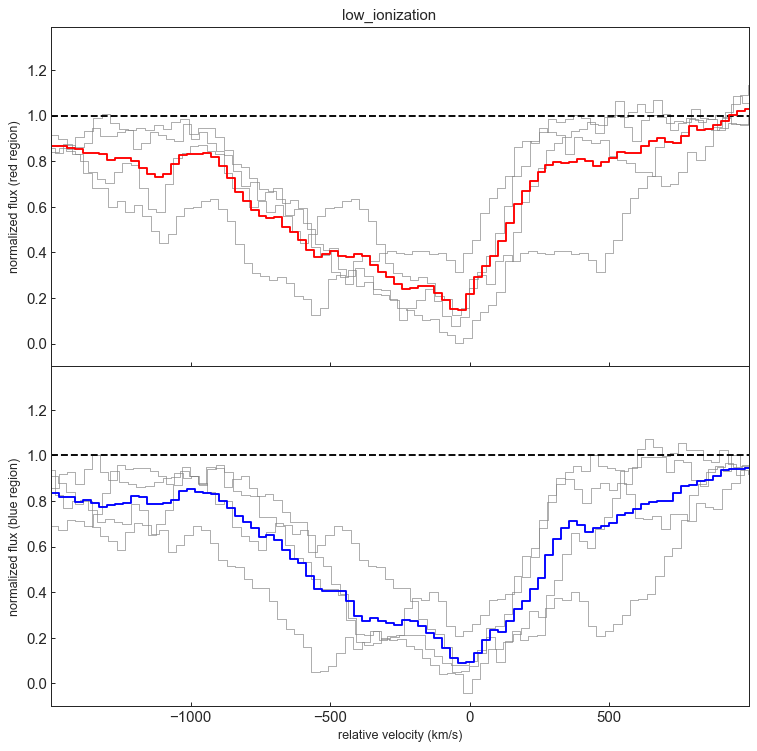

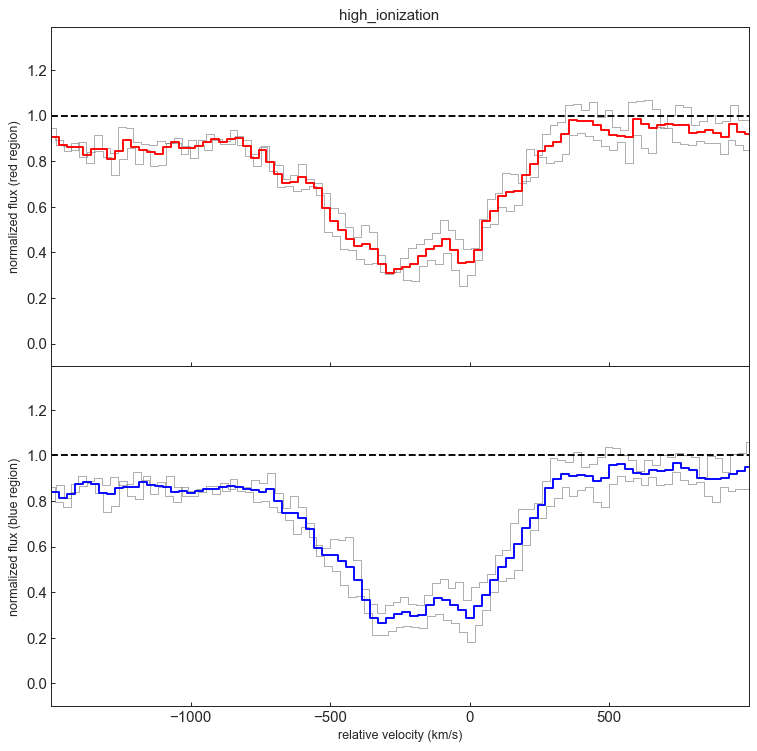

In [6]:
# plotting the AVERAGE profile for the absorption lines
avg_velpro(low_ion,(rnorm,bnorm))
avg_velpro(high_ion,(rnorm,bnorm))

#### Equivalent Width

-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 2.835 +/- 0.183 Angstrom
EW for ('OI', 1302.1685) is 3.361 +/- 0.182 Angstrom
EW for ('SiIIb', 1304.3702) is 3.127 +/- 0.190 Angstrom
EW for ('CII', 1334.5323) is 3.320 +/- 0.195 Angstrom
EW for ('SiIV_1393', 1393.755) is 2.659 +/- 0.214 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.100 +/- 0.196 Angstrom
-----------------------------------------------------
-----------------------------------------------------
EW for ('SiIIa', 1260.4221) is 3.110 +/- 0.223 Angstrom
EW for ('OI', 1302.1685) is 3.445 +/- 0.205 Angstrom
EW for ('SiIIb', 1304.3702) is 3.753 +/- 0.212 Angstrom
EW for ('CII', 1334.5323) is 3.669 +/- 0.223 Angstrom
EW for ('SiIV_1393', 1393.755) is 3.005 +/- 0.219 Angstrom
EW for ('SiIV_1402', 1402.77) is 2.262 +/- 0.234 Angstrom
-----------------------------------------------------


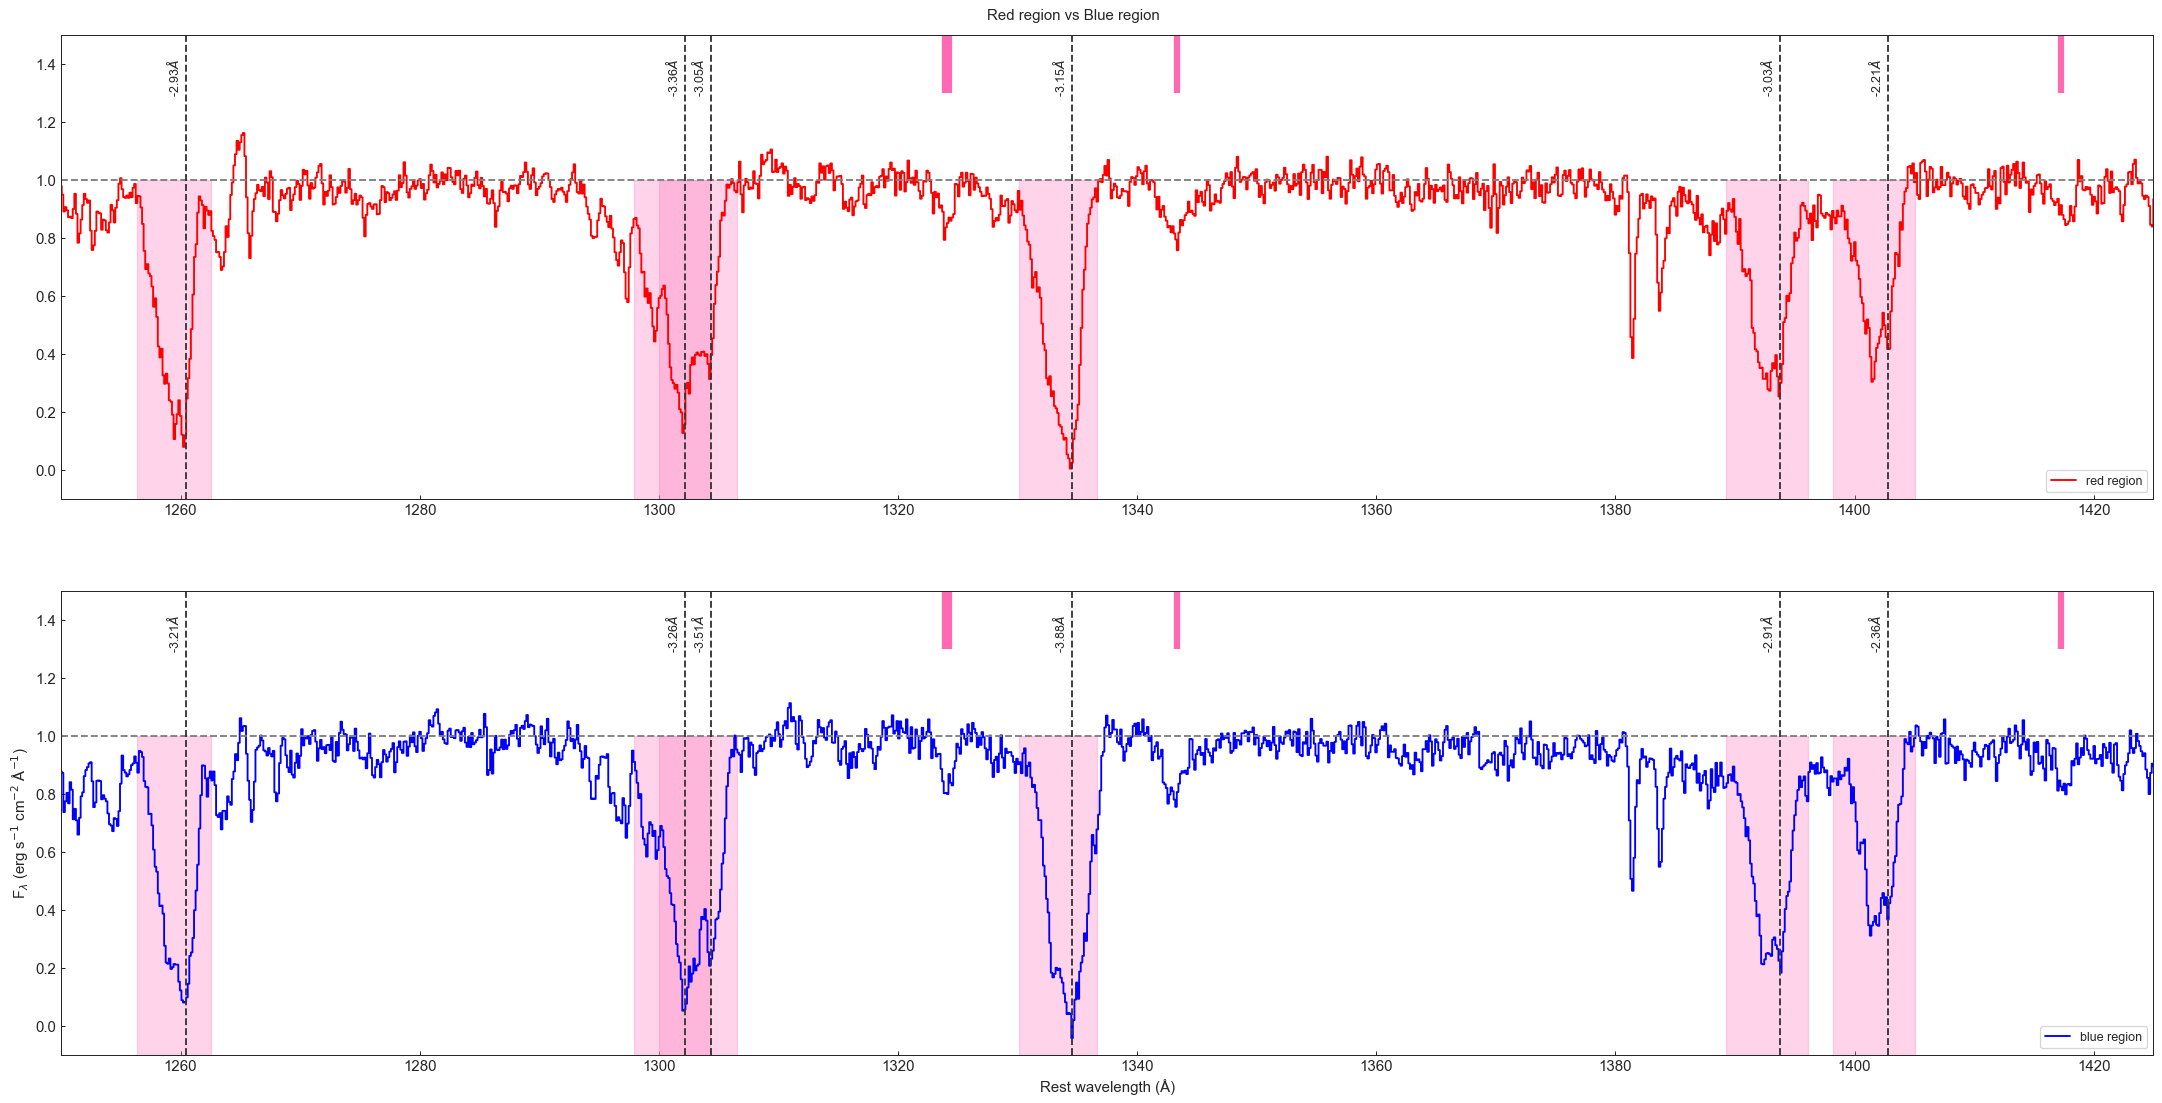

In [7]:
# Calculate the EW of the absorption lines and plot them for both regions

# ew_calc(nwavelength, (rnorm,), (rnorm_err,), abslines)
# ew_calc(nwavelength, (bnorm,), (bnorm_err,), abslines)
ew_calc(nwavelength, (rnorm,bnorm), (rnorm_err,bnorm_err), abslines)

#### Plot : Optical depth vs wavelength

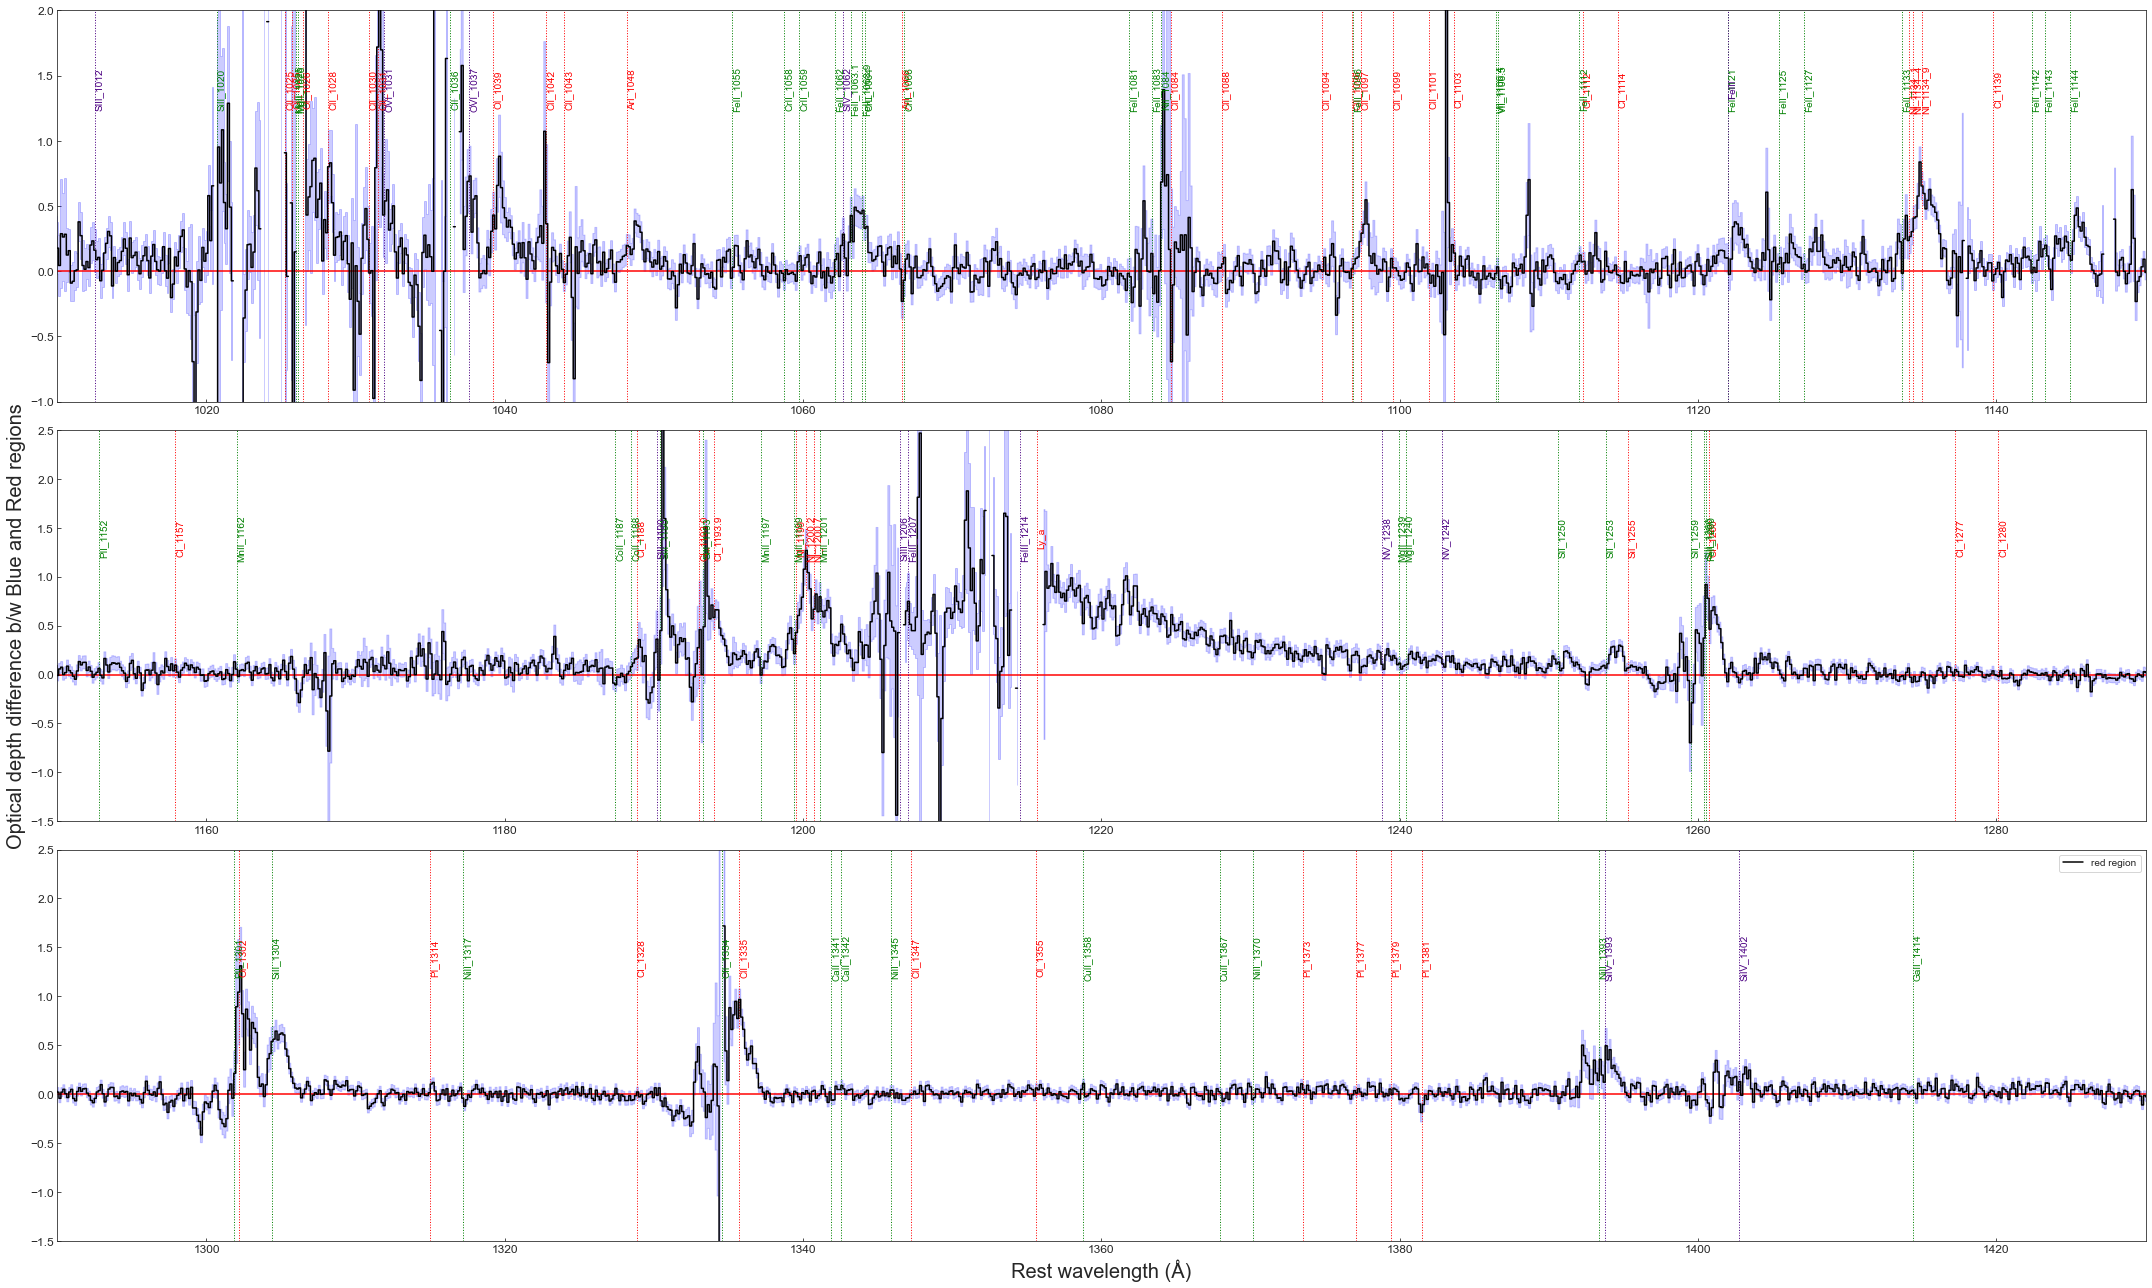

In [8]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
od_r = np.log(1/rnorm.value)
od_b = np.log(1/bnorm.value)
od_r_err = rnorm_err.value/rnorm.value
od_b_err = bnorm_err.value/bnorm.value
od_diff_err = np.sqrt(od_r_err**2 + od_b_err**2)

fig, ax = plt.subplots(3,1,figsize=(30, 18),
#                  dpi=900
                )
for i in range(3):
    ax[i].plot(nwavelength, od_b-od_r, drawstyle="steps-mid", color = 'black', zorder=3, label = 'red region')
    ax[i].fill_between(nwavelength, od_b-od_r-od_diff_err, od_b-od_r+od_diff_err, step='mid', color=ap1color, alpha =0.2)
    ax[i].axhline(y=0, color='red', ls = '-')
    for line in rlines.items():
        ax[i].axvline(line[1], linestyle=":", color="red", lw=1)
        ax[i].text(line[1],1.4, line[0],color="red",rotation=90, verticalalignment='center',clip_on=True)
    for line in glines.items():
        ax[i].axvline(line[1], linestyle=":", color="green", lw=1)
        ax[i].text(line[1],1.4, line[0],color="green",rotation=90, verticalalignment='center',clip_on=True)
    for line in tlines.items():
        ax[i].axvline(line[1], linestyle=":", color="indigo", lw=1)
        ax[i].text(line[1],1.4, line[0],color="indigo",rotation=90, verticalalignment='center',clip_on=True)


    
ax[0].axis([1010,1150,-1,2])
ax[1].axis([1150,1290,-1.5,2.5])
ax[2].axis([1290,1430,-1.5,2.5])


# plot_lines(ax1,ax2,ax3,1.4,'y')
plt.xlabel("Rest wavelength (Å)", fontsize=20)
ax[1].set_ylabel("Optical depth difference b/w Blue and Red regions", fontsize=20)
plt.tight_layout()
plt.legend()
plt.savefig('diff_line_optdepth.png')
plt.show()

#### Plot : Column density vs relative velocity

log(N) for SiIIa (red region) is 14.433859 +/- 0.047833
log(N) for SiIIa (blue region) is 14.557525 +/- 0.054897
log(N) for CII (red region) is 15.470915 +/- 0.040157
log(N) for CII (blue region) is nan +/- 0.026310
log(N) for SiIV_1393 (red region) is 14.629553 +/- 0.043000
log(N) for SiIV_1393 (blue region) is 14.677973 +/- 0.049196
log(N) for SiIV_1402 (red region) is 14.823653 +/- 0.052030
log(N) for SiIV_1402 (blue region) is 14.762075 +/- 0.052099


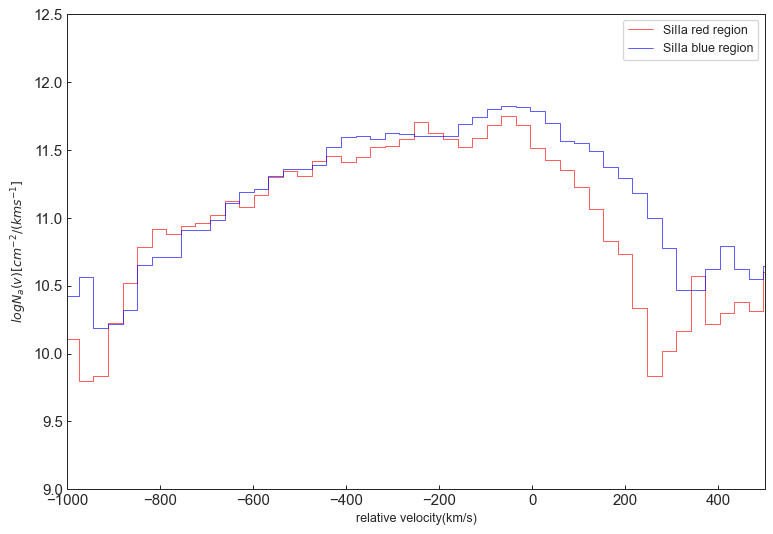

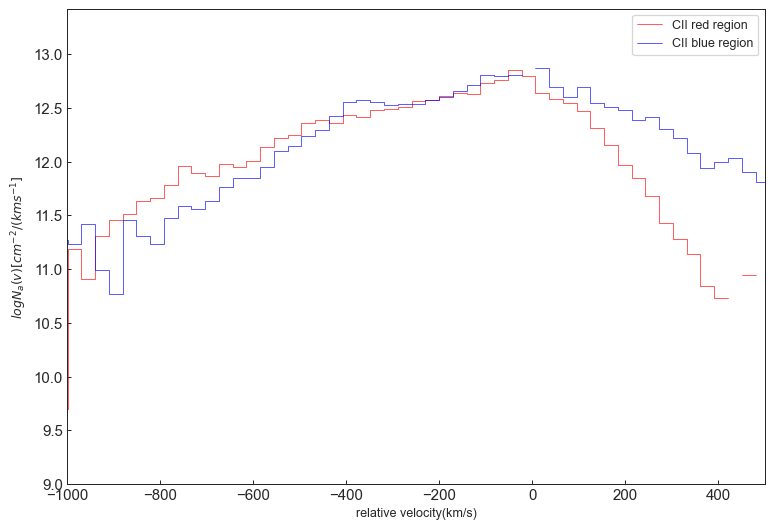

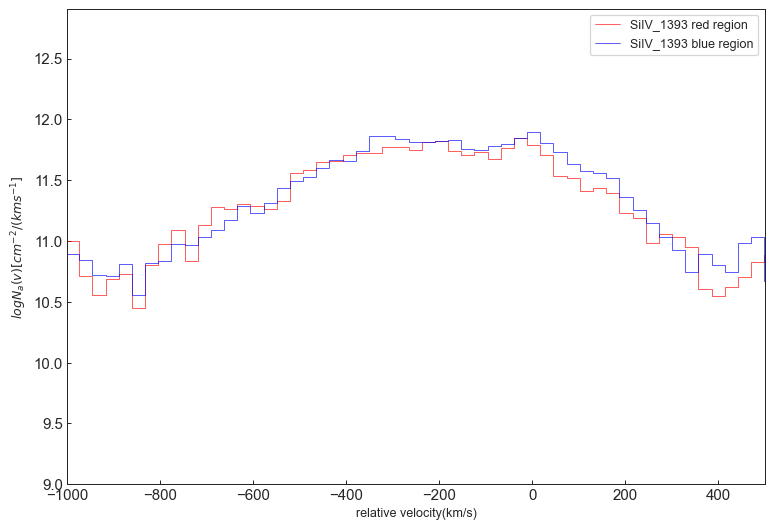

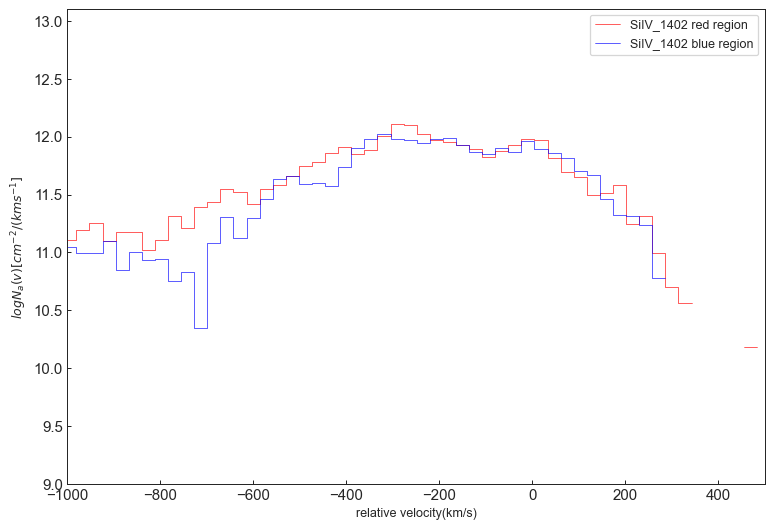

In [9]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# syntax : cold_prof2 ( absorption line | f-value | data | region(blue/red) | color )

fig = plt.figure(num=1,figsize=(10,7),dpi=90)
cold_prof2(("SiIIa", 1260.4221),1.180,rnorm,'red',1)
cold_prof2(("SiIIa", 1260.4221),1.180,bnorm,'blue',1)

# ------------------------------------------------------------------
# fig = plt.figure(num=2,figsize=(10,7),dpi=90)
# cold_prof(lines_to_measure[-2],0.513,rnorm,'red')
# cold_prof(lines_to_measure[-1],0.254,rnorm,'red')


# fig = plt.figure(num=3,figsize=(10,7),dpi=90)
# cold_prof(lines_to_measure[-2],0.513,bnorm,'blue')
# cold_prof(lines_to_measure[-1],0.254,bnorm,'blue')
# ------------------------------------------------------------------

fig = plt.figure(num=4,figsize=(10,7),dpi=90)
cold_prof2(("CII", 1334.5323),1.28E-01,rnorm,'red',1) 
cold_prof2(("CII", 1334.5323),1.28E-01,bnorm,'blue',1)

fig = plt.figure(num=5,figsize=(10,7),dpi=90)
cold_prof2(('SiIV_1393', 1393.7550),5.13E-01,rnorm,'red',1) 
cold_prof2(('SiIV_1393', 1393.7550),5.13E-01,bnorm,'blue',1)

fig = plt.figure(num=6,figsize=(10,7),dpi=90)
cold_prof2(('SiIV_1402', 1402.77),2.54E-01,rnorm,'red',1) 
cold_prof2(('SiIV_1402', 1402.77),2.54E-01,bnorm,'blue',1)
#f-values from Donald C. Morton 10.1086/377639

log(N) for CII (red region) is nan +/- 0.035649
log(N) for SiIIa (red region) is 14.525949 +/- 0.045450


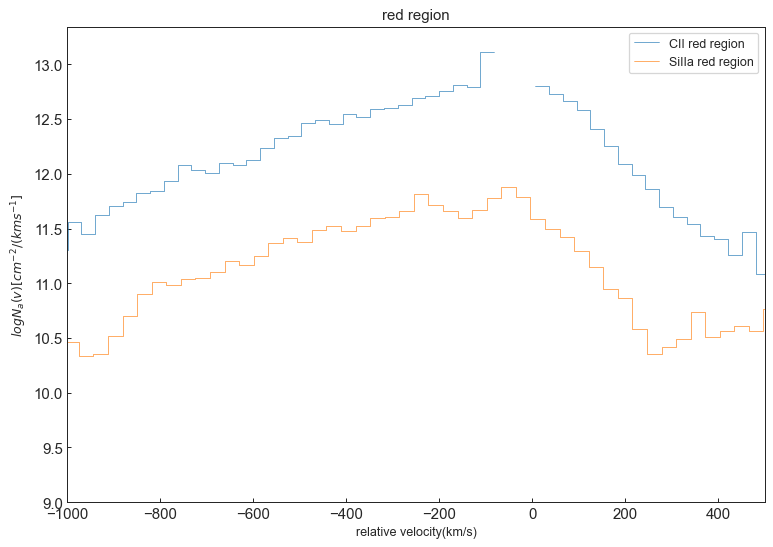

In [10]:
fig = plt.figure(num=1,figsize=(10,7),dpi=90)
cold_prof2(("CII", 1334.5323),1.28E-01,rnorm,'red')
cold_prof2(("SiIIa", 1260.4221),1.180,rnorm,'red')

log(N) for NI_1200.2 (red region) is 15.396172 +/- 0.044591
log(N) for NI_1200.2 (blue region) is 15.719685 +/- 0.039174
log(N) for NI_1134_9 (red region) is 15.658709 +/- 0.055658
log(N) for NI_1134_9 (blue region) is 15.918609 +/- 0.048417
log(N) for FeII_1142 (red region) is 16.554911 +/- 0.058529
log(N) for FeII_1142 (blue region) is 16.647965 +/- 0.057643
log(N) for FeII_1143 (red region) is 15.985812 +/- 0.056990
log(N) for FeII_1143 (blue region) is 15.999172 +/- 0.054742
log(N) for FeII_1144 (red region) is 15.275244 +/- 0.054488
log(N) for FeII_1144 (blue region) is 15.532978 +/- 0.045225


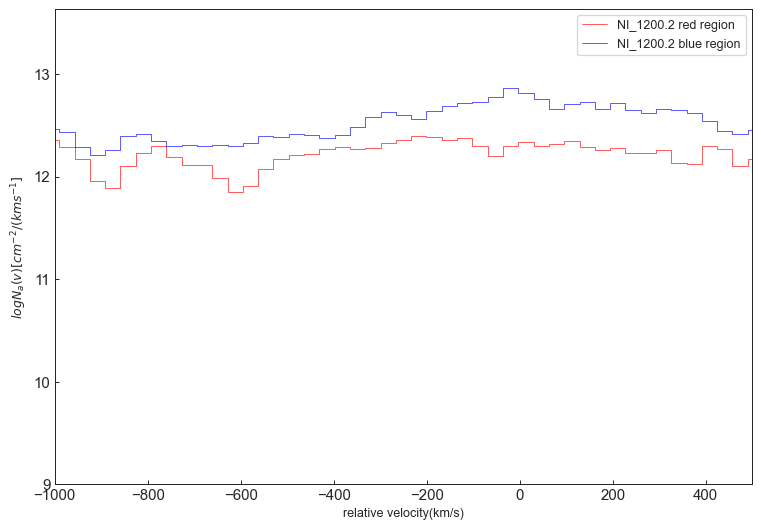

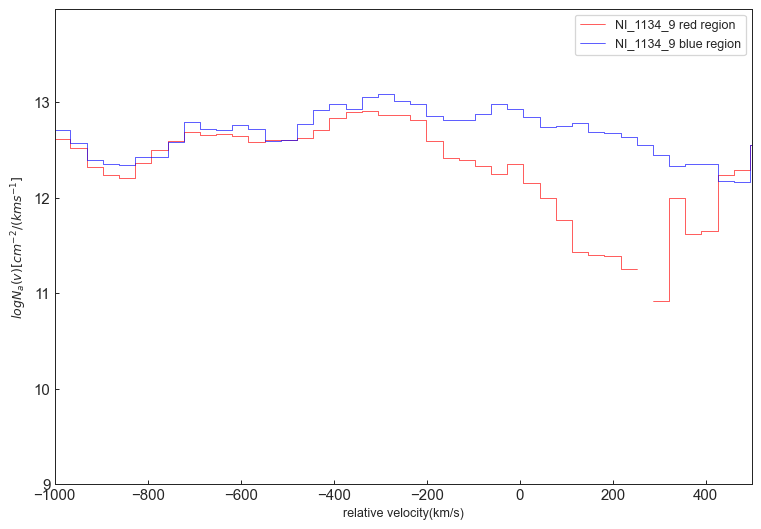

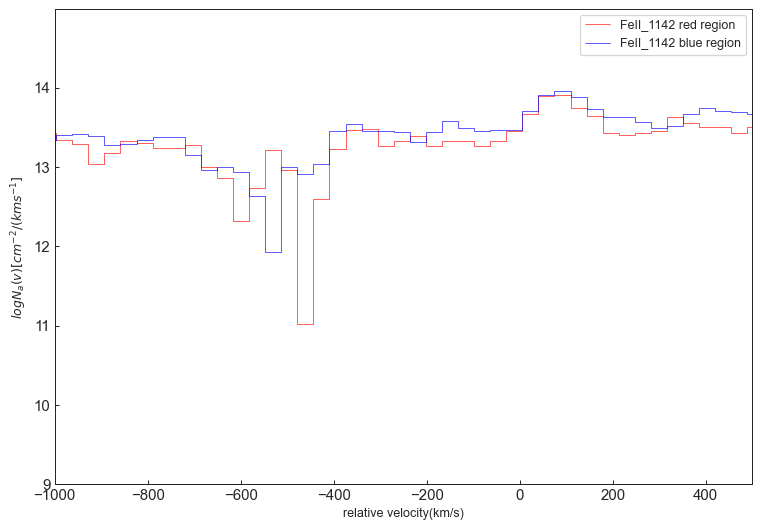

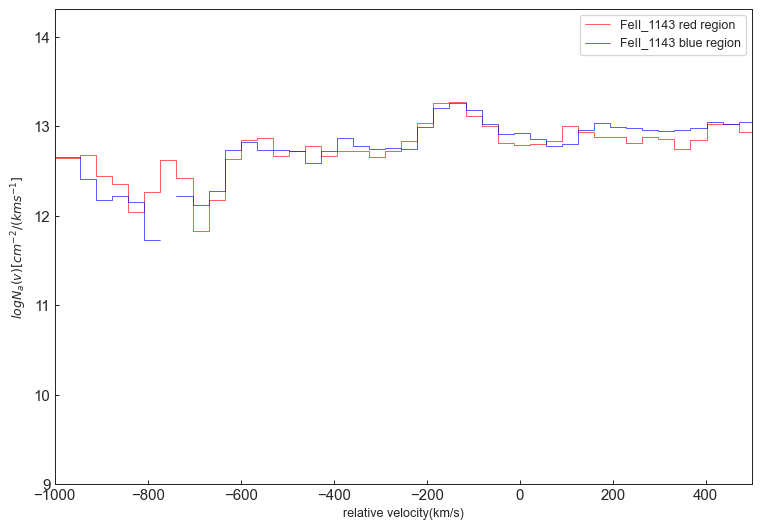

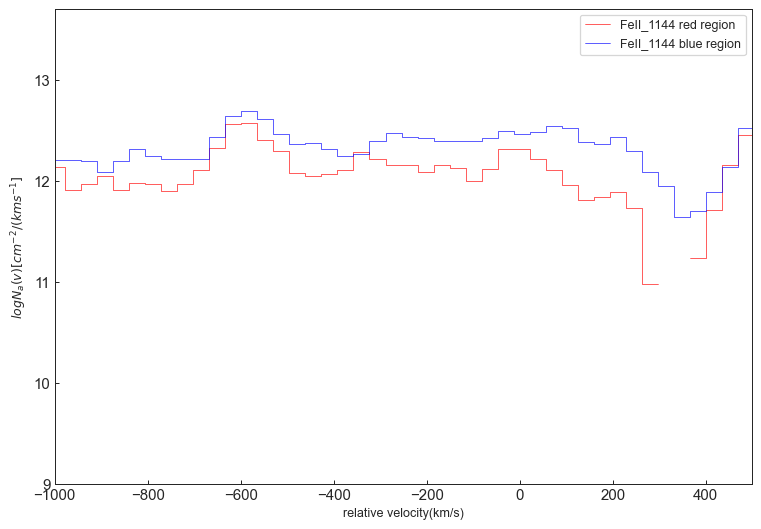

In [11]:
# bluelines1
blines_to_measure = list(bluelines1.values())

fig = plt.figure(num=1,figsize=(10,7),dpi=90)
cold_prof2(('NI_1200.2', 1200.2233),8.69E-02,rnorm,'red',1)
cold_prof2(('NI_1200.2', 1200.2233),8.69E-02,bnorm,'blue',1)

fig = plt.figure(num=2,figsize=(10,7),dpi=90)
cold_prof2(('NI_1134_9', 1134.9803),4.16E-02,rnorm,'red',1) 
cold_prof2(('NI_1134_9', 1134.9803),4.16E-02,bnorm,'blue',1)

fig = plt.figure(num=3,figsize=(10,7),dpi=90)
cold_prof2(('FeII_1142', 1142.3656),4.01E-03,rnorm,'red',1) 
cold_prof2(('FeII_1142', 1142.3656),4.01E-03,bnorm,'blue',1)

fig = plt.figure(num=4,figsize=(10,7),dpi=90)
cold_prof2(('FeII_1143', 1143.226),1.92E-02,rnorm,'red',1) 
cold_prof2(('FeII_1143', 1143.226),1.92E-02,bnorm,'blue',1)

fig = plt.figure(num=5,figsize=(10,7),dpi=90)
cold_prof2(('FeII_1144', 1144.9379),8.30E-02,rnorm,'red',1) 
cold_prof2(('FeII_1144', 1144.9379),8.30E-02,bnorm,'blue',1)

#f-values from Donald C. Morton 10.1086/377639

In [25]:
# LOW ionization optical depth comparison
# ------------------------------------------------------------------
xvals = np.linspace(-1500,1500,106) * u.km/u.s

'''
we don't want to lose any data, and 106 points is around the upper limit 
in the (-1500,1500) range so it is easier to map data for all ionization 
lines to the same x-axis.
'''
low_od_r = np.array([abslines_od(('SiIIa', 1260.4221),rnorm),
                        abslines_od(("CII", 1334.5323),rnorm),
                        abslines_od(('OI', 1302.1685),rnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),rnorm,(-700,-190))])

low_od_b = np.array([abslines_od(('SiIIa', 1260.4221),bnorm),
                        abslines_od(("CII", 1334.5323),bnorm),
                        abslines_od(('OI', 1302.1685),bnorm,(400,798)),
                        abslines_od(('SiIIb', 1304.3702),bnorm,(-700,-190))])

# masking for OI and SiIIb -- repeats/closely spaced

# HIGH ionization optical depth comparison
# ------------------------------------------------------------------
high_od_r = np.nanmean((abslines_od(('SiIV_1393', 1393.75),rnorm),
                        abslines_od(('SiIV_1402', 1402.75),rnorm)),axis=0)
high_od_b = np.nanmean((abslines_od(('SiIV_1393', 1393.75),bnorm),
                        abslines_od(('SiIV_1402', 1402.75),bnorm)),axis=0)


# ------------------------------------------------------------------
# [0] for red and [1] for blue / recall col=(ap0color,ap1color)
norm_data = (rnorm,bnorm)
od = (od_r,od_b)
od_err = (od_r_err,od_b_err)
low_od = (low_od_r,low_od_b)
high_od = (high_od_r,high_od_b)
# ------------------------------------------------------------------

# mask the velocities corresponding to the range
opp = np.where((velo(("SiIIb", 1304.3702)).value<-700) | (velo(("SiIIb", 1304.3702)).value>-200), velo(("SiIIb", 1304.3702)), np.nan)
opp1 = np.where((velo(("OI", 1302.1685)).value<400) | (velo(("OI", 1302.1685)).value>798), velo(("OI", 1302.1685)), np.nan)

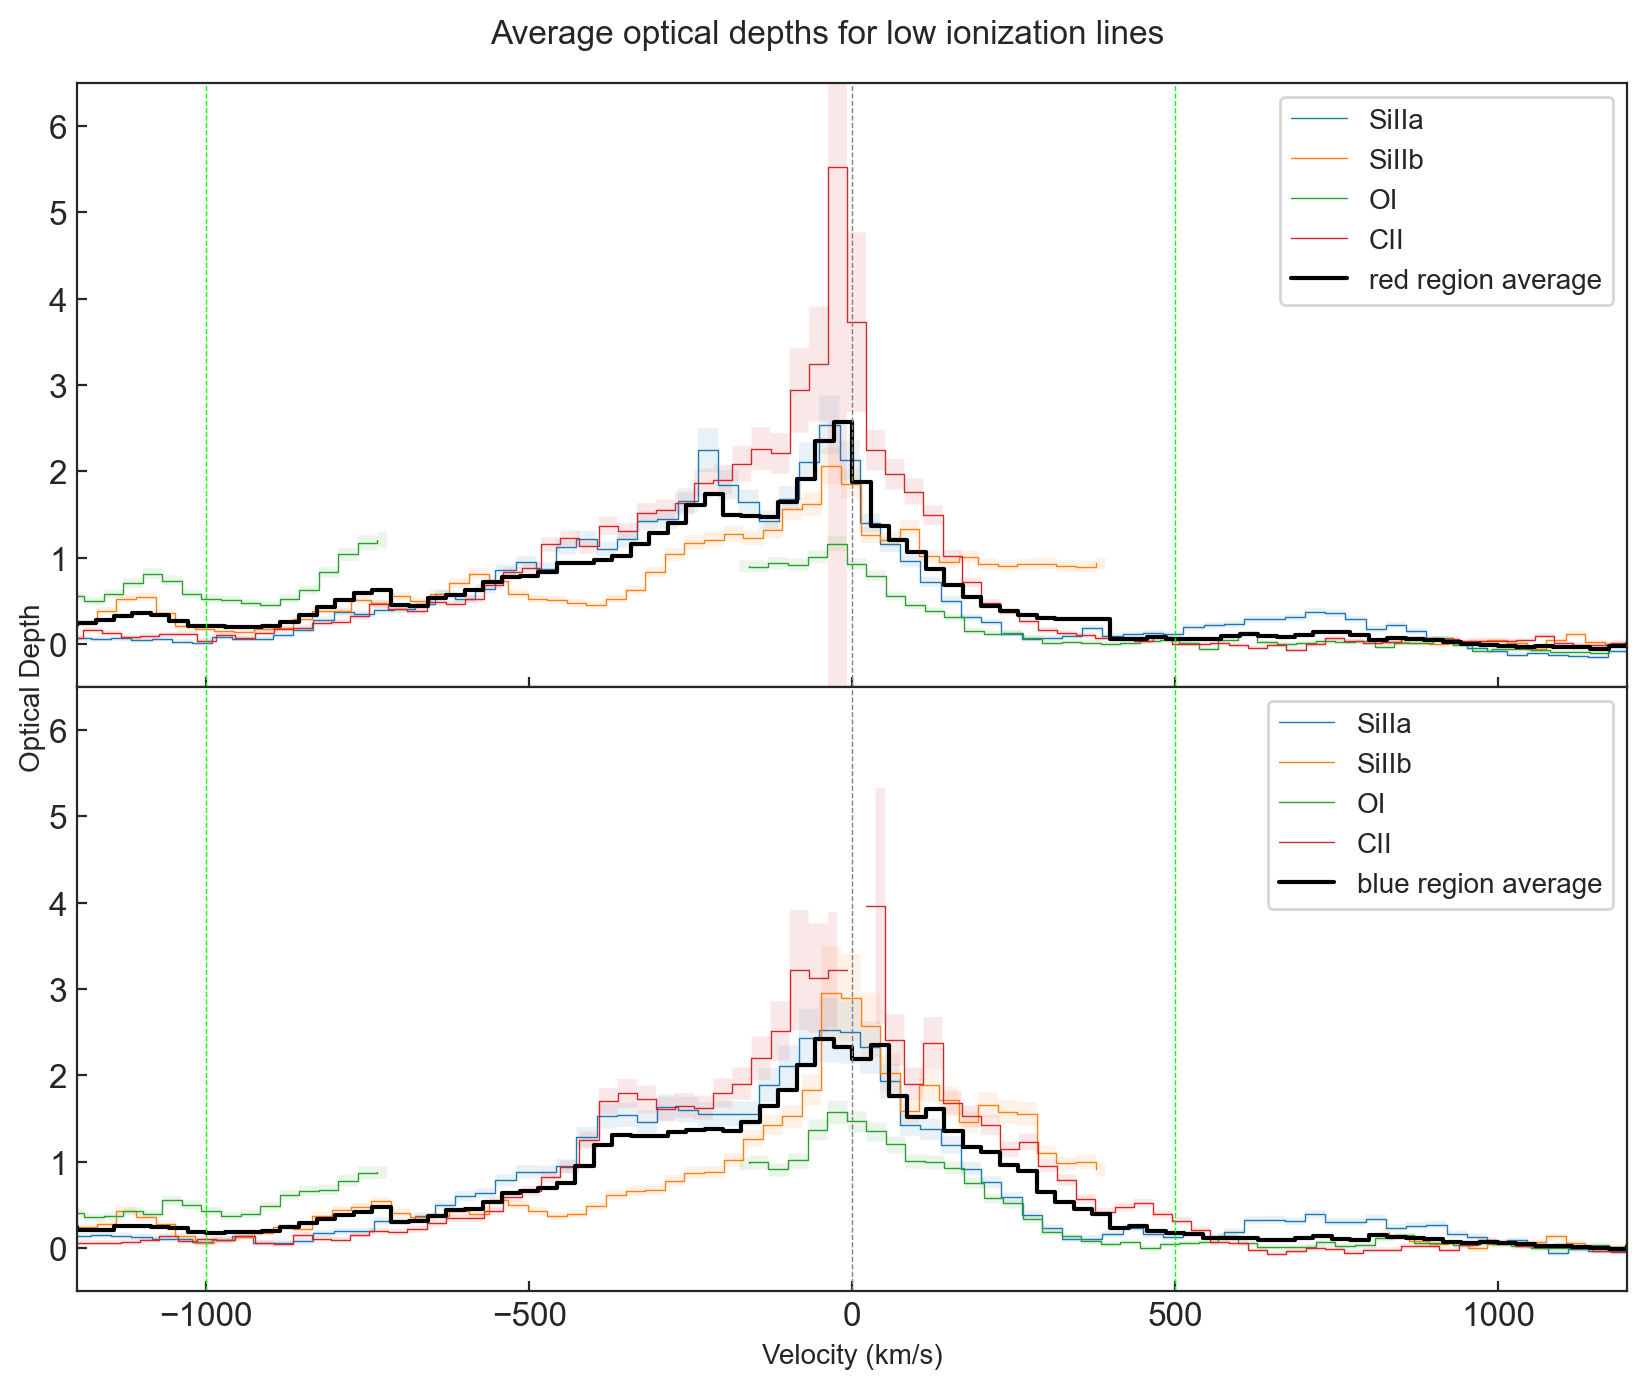

In [15]:
# Plot for LOW ionization optical depth
# ------------------------------------------------------------------

fig,ax = plt.subplots(len(norm_data),1,sharex=True,sharey=True,figsize=(10,len(norm_data)*4),dpi=200)
for i in range(len(norm_data)):

    # optical depths
    ax[i].plot(velo(("SiIIa", 1260.4221)),od[i],lw=0.5,drawstyle='steps-mid',label='SiIIa')
    ax[i].plot(opp1,od[i],lw=0.5,drawstyle='steps-mid',label='SiIIb')
    ax[i].plot(opp,od[i],lw=0.5,drawstyle='steps-mid',label="OI")
    ax[i].plot(velo(("CII", 1334.5323)),od[i],lw=0.5,drawstyle='steps-mid',label="CII")

    # errors
    ax[i].fill_between(velo(("SiIIa", 1260.4221)), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp1, od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(opp, 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)
    ax[i].fill_between(velo(("CII", 1334.5323)), 
                        od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)

    # average profile
    ax[i].plot(xvals,np.nanmean(low_od[i],axis=0),color='k',label='%s region average'%col[i],drawstyle="steps-mid")
    
    # EW calculation limits
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)


    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.5,6.5)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.02,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for low ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('low_ion_optd.png')
plt.show()

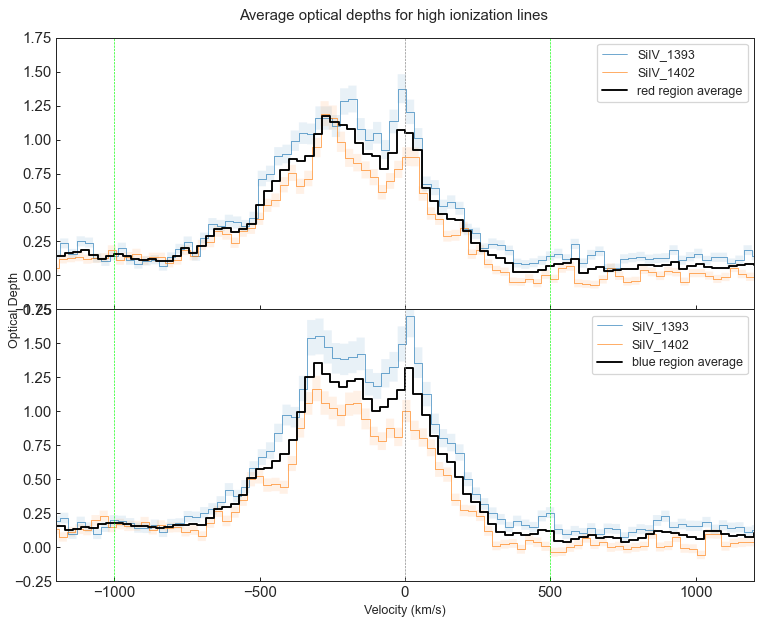

In [14]:
# Plot for HIGH ionization optical depth
# ------------------------------------------------------------------
fig,ax = plt.subplots(len(norm_data),1,sharex=True,figsize=(10,len(norm_data)*4),dpi=90)
for i in range(len(norm_data)):
    for j in high_ion.items():
        # optical depths
        ax[i].plot(velo(j),od[i],lw=0.5, drawstyle="steps-mid",label='%s'%j[0])
        # errors
        ax[i].fill_between(velo(j), od[i]-od_err[i], od[i]+od_err[i], step='mid', alpha =0.1)

    # average profile
    ax[i].plot(xvals,high_od[i],color='k',label='%s region average'%col[i],drawstyle="steps-mid")

    # EW calculation limits
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)

    ax[i].axvline(0,color='gray',ls='--',lw=0.5)
    ax[i].set_xlim(-1200,1200)
    ax[i].set_ylim(-0.25,1.75)
    ax[i].legend()
ax[0].get_shared_x_axes().join(ax[0], ax[1])
ax[1].set_xlabel('Velocity (km/s)')
ax[1].yaxis.set_label_coords(-0.05,1)
ax[1].set_ylabel('Optical Depth')
plt.suptitle('Average optical depths for high ionization lines',y=0.92)
plt.subplots_adjust(hspace=0)

# plt.savefig('high_ion_optd.png')
plt.show()

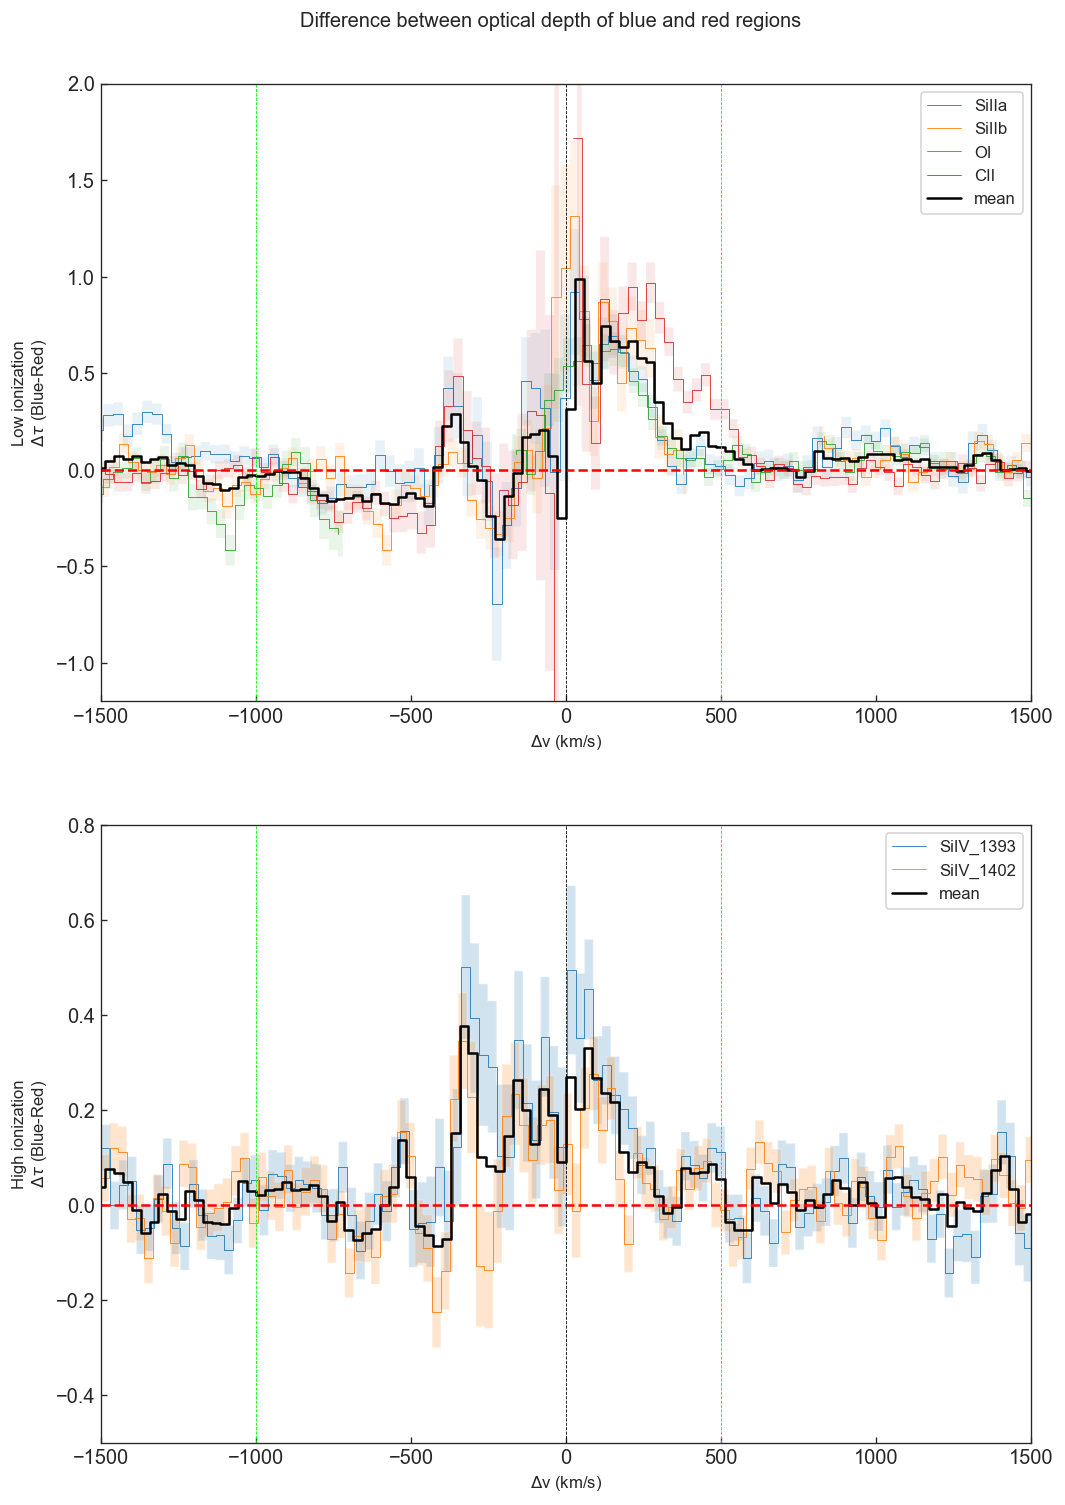

In [56]:
# difference plot for optical depths
# ------------------------------------------------------------------

fig, ax = plt.subplots(2,1,figsize=(10,15),dpi=120)

# axis1
# --------------------------------------------------
ax[0].set_ylabel('Low ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=10)

# optical depths for low_ion
ax[0].plot(velo(("SiIIa", 1260.4221)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiIIa')
ax[0].plot(opp1,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='SiIIb')
ax[0].plot(opp,od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="OI")
ax[0].plot(velo(("CII", 1334.5323)),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label="CII")

# errors
ax[0].fill_between(velo(("SiIIa", 1260.4221)), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp1, od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(opp, 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)
ax[0].fill_between(velo(("CII", 1334.5323)), 
                    od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.1)


ax[0].plot(xvals,np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),'k',drawstyle='steps-mid',label='mean')
ax[0].set_ylim(-1.2,2)
# axis2
# --------------------------------------------------
ax[1].set_ylabel('High ionization' '\n' r'$\Delta \tau$ (Blue-Red)',fontsize=10)

# optical depths and errors for high_ion
for j in high_ion.items():
    ax[1].plot(velo(j),od[1]-od[0],lw=0.5,drawstyle='steps-mid',label='%s'%j[0])
    ax[1].fill_between(velo(j), od[1]-od[0]-od_diff_err, od[1]-od[0]+od_diff_err, step='mid', alpha =0.2)


ax[1].plot(xvals,high_od[1]-high_od[0],'k',drawstyle='steps-mid',label='mean')
ax[1].set_ylim(-0.5,0.8)

for i in range(len(norm_data)):
    ax[i].axhline(0,color='r',ls='--')
    ax[i].axvline(-1000,color='lime',ls='--',lw=0.5)
    ax[i].axvline(500,color='lime',ls='--',lw=0.5)
    ax[i].axvline(0,color='k',ls='--',lw=0.5)
    ax[i].set_xlim(-1500,1500)
    ax[i].legend()
    ax[i].set_xlabel(r'$\Delta$v (km/s)')
    # ax[i].set_ylabel(r'$\Delta \tau$ (Blue-Red)')
    # plt.subplots_adjust(hspace=0)

plt.suptitle('Difference between optical depth of blue and red regions',y=0.92)
plt.savefig('optd_diff.png')
plt.show()

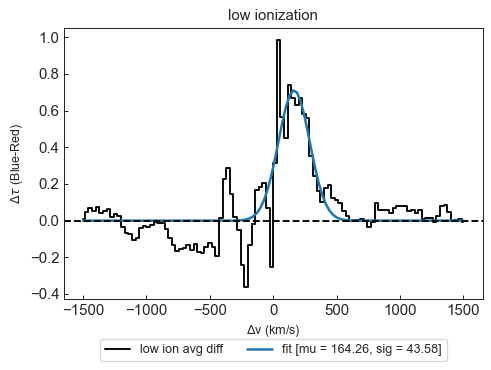

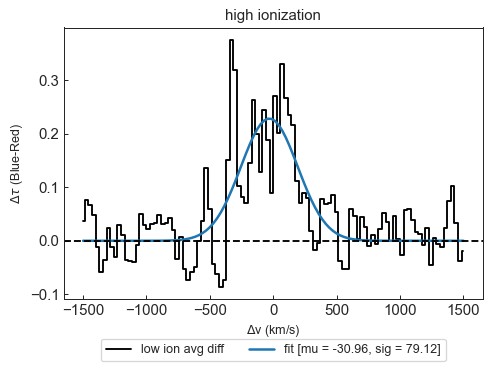

In [152]:
# new array to hold both the means of low and high ionization lines
od_mean = (np.nanmean(low_od[1],axis=0)-np.nanmean(low_od[0],axis=0),high_od[1]-high_od[0])

# define a single gaussian function to fit
def gaussian(x, A, mu, sig):
    return A * np.exp(-((x - mu) / 4 / sig)**2)


# LOW ION PLOT
# --------------------------------------------------
popt,pcov = curve_fit(gaussian,xvals,od_mean[0],p0=[1,210,1]) #expected peak around 200
fit = gaussian(xvals.value,*popt)

plt.figure(num=1,dpi=90)

plt.plot(xvals,od_mean[0],color='k',drawstyle='steps-mid',label='low ion avg diff') # low ionization
plt.plot(xvals,fit,label='fit [mu = %0.2f, sig = %0.2f]'%(popt[1],popt[2]),lw=2) #fitted profile

plt.title('low ionization')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'$\Delta$v (km/s)')
plt.axhline(0,color='k',ls='--')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()


# HIGH ION PLOT
# --------------------------------------------------
popt,pcov = curve_fit(gaussian,xvals,od_mean[1],p0=[2,0,3]) #expected peak around 200
fit = gaussian(xvals.value,*popt)

plt.figure(num=2,dpi=90)

plt.plot(xvals,od_mean[1],color='k',drawstyle='steps-mid',label='low ion avg diff') # low ionization
plt.plot(xvals,fit,label='fit [mu = %0.2f, sig = %0.2f]'%(popt[1],popt[2]),lw=2) #fitted profile

plt.title('high ionization')
plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
plt.xlabel(r'$\Delta$v (km/s)')
plt.axhline(0,color='k',ls='--')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
plt.show()


[0.72074395]


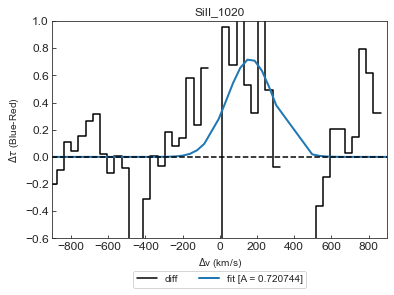

[1.08355291]


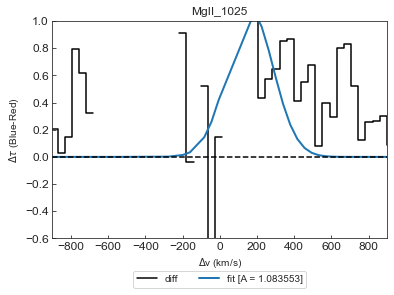

[1.09103461]


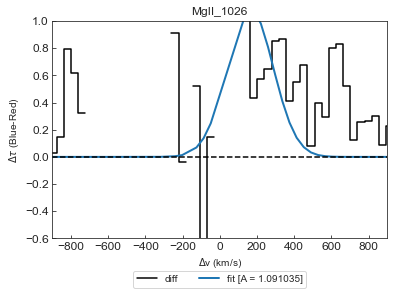

[1.12381882]


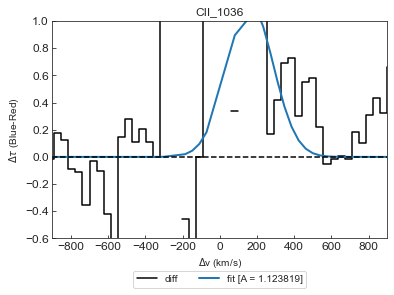

[0.11360736]


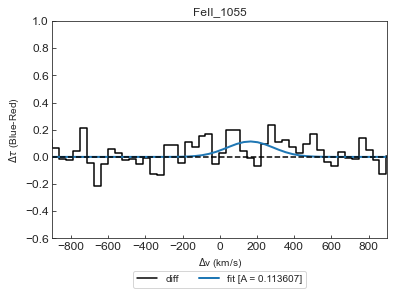

[-0.00356155]


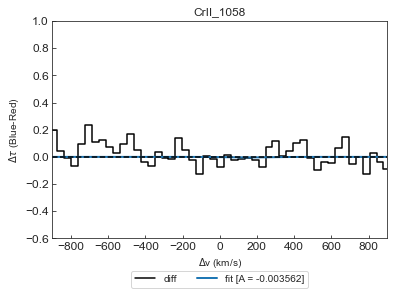

[0.04241441]


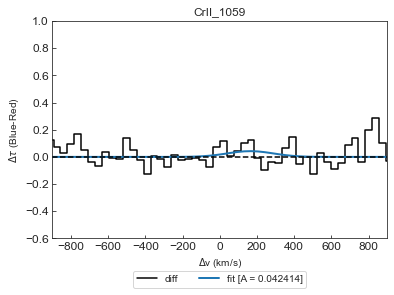

[0.21912901]


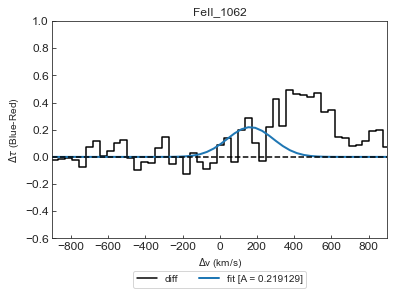

[0.51868894]


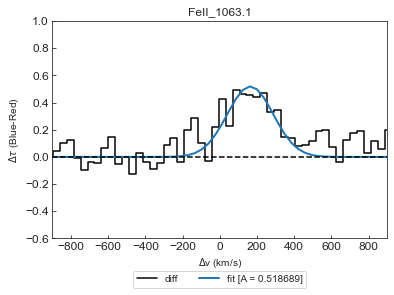

[0.29050861]


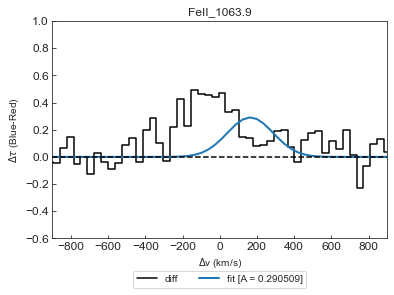

[0.24552407]


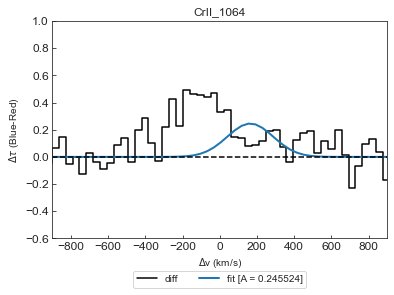

[0.00264763]


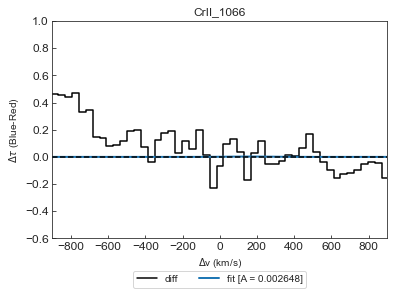

[0.05041147]


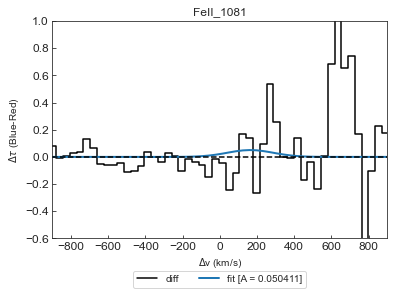

[0.44277099]


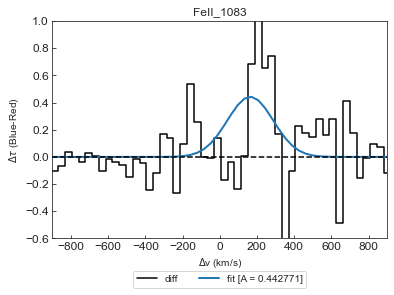

[0.36669816]


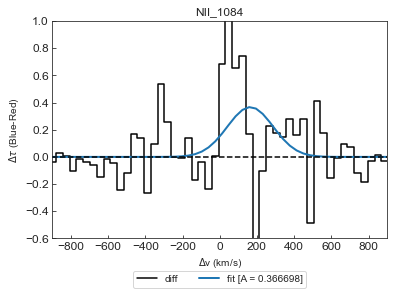

[0.30788709]


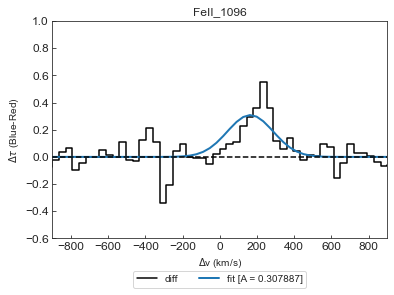

[-0.08274115]


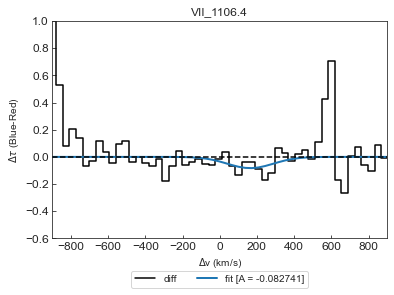

[-0.07974872]


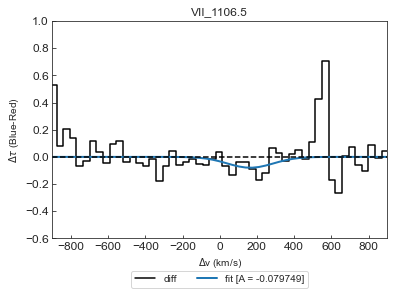

[0.09817845]


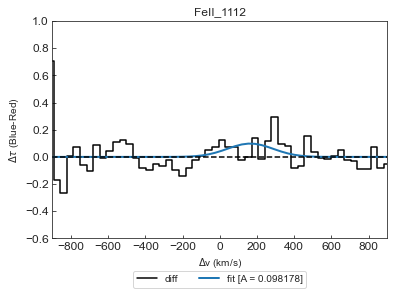

[0.33501427]


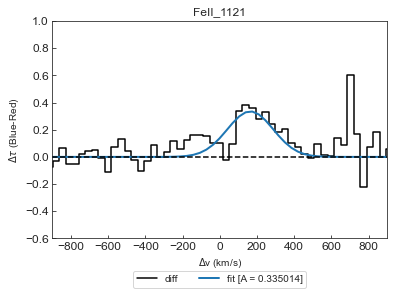

[0.17173834]


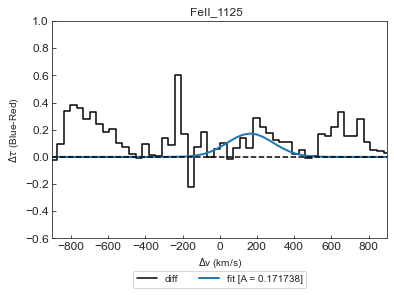

[0.20866459]


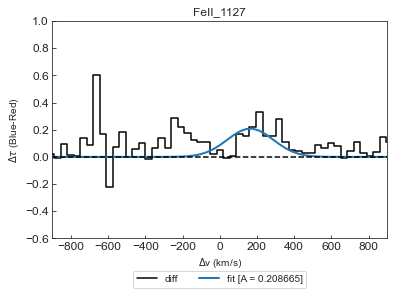

[0.51468742]


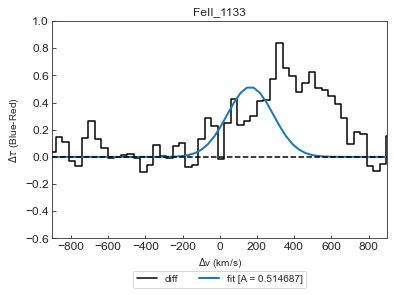

[0.14554235]


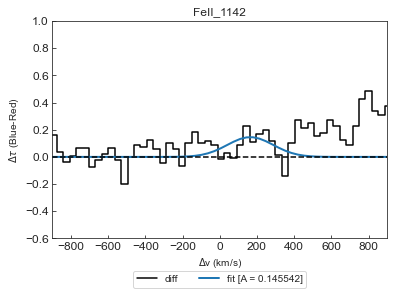

[0.18976317]


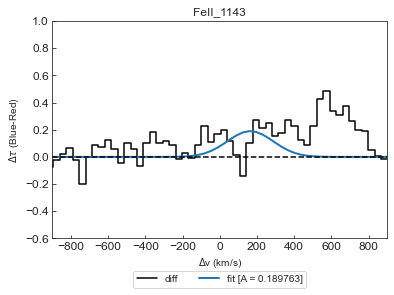

[0.39899381]


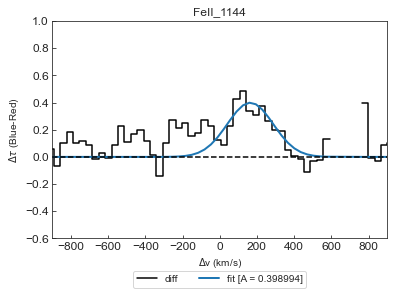

[0.1048318]


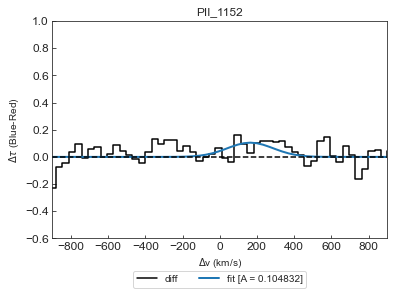

[0.06616722]


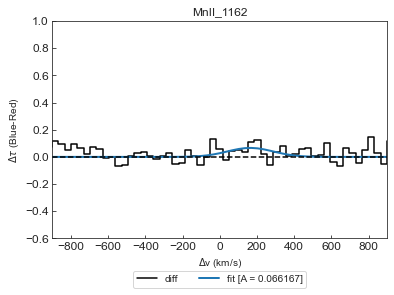

[0.02499216]


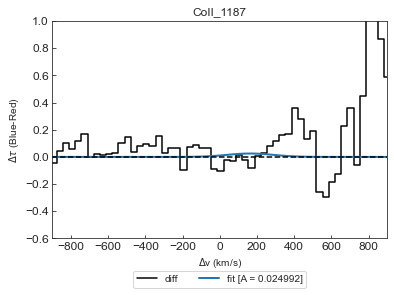

[0.14388657]


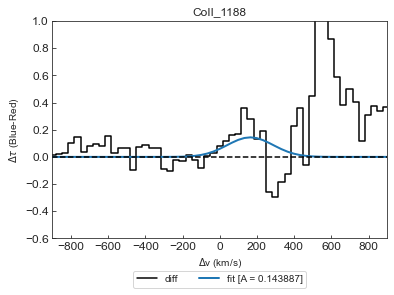

In [186]:
def trial(x, A):
    return A * np.exp(-((x - 164.26) / 4 / 43.58)**2)

for i in glines.items():
    if i[1]<1190:
        plt.figure()
        mask = np.isfinite(od[1]-od[0])
        yy = od[1][mask]-od[0][mask]
        plt.plot(velo(i),od[1]-od[0],color='k',drawstyle='steps-mid',label='diff') # low ionization
        popt,pcov = curve_fit(trial,velo(i)[mask],yy) #expected peak around 200
        fit = trial((velo(i)[mask]).value,*popt)
        plt.plot(velo(i)[mask],fit,label='fit [A = %f]'%popt[0],lw=2) #fitted profile
        print(popt)

        plt.xlim(-900,900)
        plt.ylim(-0.6,1)
        plt.ylabel(r'$\Delta \tau$ (Blue-Red)')
        plt.xlabel(r'$\Delta$v (km/s)')
        plt.axhline(0,color='k',ls='--')
        plt.title("%s"%i[0])

        plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2)
        plt.show()

In [177]:
mask = np.isfinite(od[1]-od[0])
yy = od[1][mask]-od[0][mask]

(velo(("OI", 1302.1685))[mask]).value

array([-91491.74834549, -91370.41948109, -91188.54129726, ...,
        40117.83795458,  40147.99750152,  40178.38727401])

#### Plot : Column density vs relative velocity

/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aaich/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


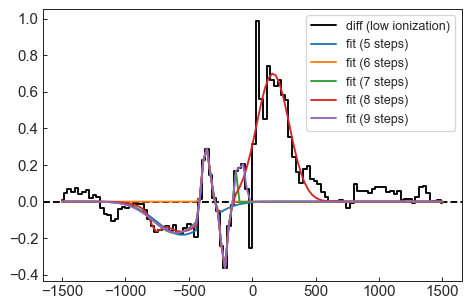

In [90]:
# define a multi gaussian to fit
def multi(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        mu = params[i]
        A = params[i+1]
        sig = params[i+2]
        # off = params[i+3]
        y = y + A * np.exp( -((x - mu)/sig)**2)
    return y

# PLOT
# --------------------------------------------------
plt.figure(num=1,dpi=90)
plt.axhline(0,color='k',ls='--')
plt.plot(xvals,od_mean[0],color='k',drawstyle='steps-mid',label='diff (low ionization)')
ite = np.arange(6,11,1)
for j in ite:
    guess = [1, 1, 1, 1, 1, 0.1]
    for i in range(j):
        guess += [-500+50*i, 1, 15]
    popt, pcov = curve_fit(multi, xvals, od_mean[0], p0=guess)
    fit = multi(xvals.value, *popt)
    # plt.plot(xvals,np.nanmean(low_od[1],axis=0),drawstyle='steps-mid',label='low ionization red')
    plt.plot(xvals,fit,label='fit (%0.0f steps)'%i)
    plt.legend()

plt.show()



In [ ]:
#scan the entire spectrum for this model